In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from geopy.geocoders import Nominatim
from haversine import haversine

In [2]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [48]:
df_sub = pd.read_csv('./data/data_set/서울시 지하철.csv')
df_sub.drop('Unnamed: 0', axis = 1, inplace = True)
df_sub

,역명,도로명주소,경도,위도
0,도봉산,서울특별시 도봉구 도봉로 964-33,127.046130,37.689176
1,도봉,서울특별시 도봉구 도봉로 170길 2,127.045755,37.680323
2,방학,서울특별시 도봉구 도봉로 150다길 3,127.044409,37.666308
3,창동,서울특별시 도봉구 마들로11길 77,127.048114,37.653186
4,녹천,서울특별시 도붕구 덕릉로 376,127.045418,37.643186
...,...,...,...,...
246,구룡,서울특별시 강남구 개포로 403,127.059249,37.487026
247,개포동,서울특별시 강남구 개포로 420,127.066531,37.489233
248,대모산입구,서울특별시 강남구 개포로 522,127.073161,37.491515
249,양재시민의숲,서울특별시 서초구 매헌로 116,127.036509,37.468619


In [49]:
res = pd.read_csv('./data/data_set/맛집 데이터 3.5 이상.csv')
res.drop('Unnamed: 0', axis = 1, inplace = True)
res

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점
0,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000
1,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463
2,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000
3,옥돌,4.5,성북구,서울특별시 성북구 동소문로17길 11,양식,만원-2만원,2022-07-18,맛있다,5.0,5.0,0.0,0.0,4.500000
4,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31.0,28.0,3.0,0.0,3.974194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000


In [50]:
geo_local = Nominatim(user_agent='South Korea')
def geocoding(address):
    try:
        geo = geo_local.geocode(address)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

In [51]:
i = 0
address = []

for i in range(len(res['주소'])):
    a = res.loc[i, '주소'].split(' ')
    address.append(" ".join(a[0:4]))

In [52]:
latitude = []
longitude =[]
i = 0
for i in address:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

In [53]:
i = 0
for i in range(0, len(res)):
    res.loc[i, '위도'] = latitude[i]
    res.loc[i, '경도'] = longitude[i]
res

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점,위도,경도
0,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000,37.588018,127.008705
1,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463,37.594813,126.996092
2,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000,37.589844,127.018918
3,옥돌,4.5,성북구,서울특별시 성북구 동소문로17길 11,양식,만원-2만원,2022-07-18,맛있다,5.0,5.0,0.0,0.0,4.500000,37.593999,127.015822
4,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31.0,28.0,3.0,0.0,3.974194,37.592923,127.033523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000,37.495986,126.817216
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286,37.484729,126.901442
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364,37.500891,126.890202
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000,37.484090,126.890270


In [54]:
distance = []
for i in range(0, len(res)):
    for j in range(0, len(df_sub)):
        start = (float(df_sub.loc[j, '위도']), float(df_sub.loc[j, '경도'])) # (lat, lon)
        goal = (float(res.loc[i, '위도']), float(res.loc[i, '경도']))
        distance.append(haversine(start, goal))
        
    res.loc[i, '인접역'] = df_sub.loc[distance.index(min(distance)), '역명']
    res.loc[i, '인접역까지의거리'] = min(distance)
    distance = []

In [55]:
res.to_csv('./data/data_set/맛집 인접역 추가(전체).csv')
res

,식당명,별점,구,주소,음식종류,가격대,리뷰날짜,리뷰평가,리뷰수,맛있다수,괜찮다수,별로다수,평점,위도,경도,인접역,인접역까지의거리
0,뽀르께노 스페니쉬비스트로,4.6,성북구,서울특별시 성북구 동소문로6길 4-21 1F,다국적음식,만원-2만원,2022-07-22,맛있다,7.0,7.0,0.0,0.0,4.600000,37.588018,127.008705,성신여대입구,0.412766
1,성북동집,4.5,성북구,서울특별시 성북구 성북로24길 4,한식,만원-2만원,2022-07-28,맛있다,41.0,35.0,6.0,0.0,3.841463,37.594813,126.996092,성신여대입구,1.330799
2,계모임,4.5,성북구,서울특별시 성북구 보문로30라길 5-10 1F,한식,만원-2만원,5 일 전,맛있다,10.0,10.0,0.0,0.0,4.500000,37.589844,127.018918,한성대입구,0.409768
3,옥돌,4.5,성북구,서울특별시 성북구 동소문로17길 11,양식,만원-2만원,2022-07-18,맛있다,5.0,5.0,0.0,0.0,4.500000,37.593999,127.015822,한성대입구,0.437159
4,우정초밥,4.4,성북구,서울특별시 성북구 종암로3길 31 1F,일식,2만원-3만원,2022-06-18,맛있다,31.0,28.0,3.0,0.0,3.974194,37.592923,127.033523,청량리,0.666402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,고바우덩어리생고기,4.2,구로구,서울특별시 구로구 부일로1길 9,한식,만원-2만원,2022-07-25,맛있다,6.0,6.0,0.0,0.0,4.200000,37.495986,126.817216,온수,0.723840
767,춘자싸롱,4.7,구로구,서울특별시 구로구 디지털로32나길 11,한식,만원-2만원,2020-10-15,맛있다,14.0,13.0,1.0,0.0,4.364286,37.484729,126.901442,구로디지털단지,0.044818
768,부뚜막청국장,4.0,구로구,서울특별시 구로구 구로중앙로28길 24,한식,만원-2만원,2021-06-16,맛있다,11.0,10.0,1.0,0.0,3.636364,37.500891,126.890202,구로,0.786433
769,이미커피,4.7,구로구,서울특별시 구로구 디지털로27길 116 101호,카페/디저트,만원 미만,2021-09-13,맛있다,4.0,4.0,0.0,0.0,4.700000,37.484090,126.890270,남구로,0.490202


In [57]:
ex1 = pd.DataFrame(res.인접역까지의거리.value_counts())
ex1.rename(columns = {'인접역까지의거리' : '인접역수'}, inplace = True)
ex1['인접역까지의거리'] = ex1.index

ex1 = ex1.sort_values('인접역까지의거리')
ex1.reset_index(inplace = True, drop=True)
ex1

,인접역수,인접역까지의거리
0,1,0.010223
1,2,0.016763
2,1,0.016900
3,2,0.019532
4,2,0.025799
...,...,...
592,1,2.004074
593,1,2.195832
594,1,2.285560
595,1,2.414267


In [58]:
tmp = ex1[ex1['인접역수'] == 7].index
ex1 = ex1.drop(tmp)

In [60]:
dis = ex1['인접역까지의거리'].to_list()
data = dis
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3]
labels = ['0.5이하', '1이하', '1.5이하', '2이하', '2.5이하', '3이하']

In [61]:
cats = pd.cut(data, bins, labels = labels)
cat_list = list(cats)
cat_list

['0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',
 '0.5이하',


In [62]:
from collections import Counter
a = []
b = []
result = Counter(cat_list)

for key in result:
    a.append(key)
    b.append(result[key])

df_dis = pd.DataFrame((zip(a, b)), columns = ['거리', '수'])
df_dis

,거리,수
0,0.5이하,316
1,1이하,186
2,1.5이하,69
3,2이하,19
4,2.5이하,4


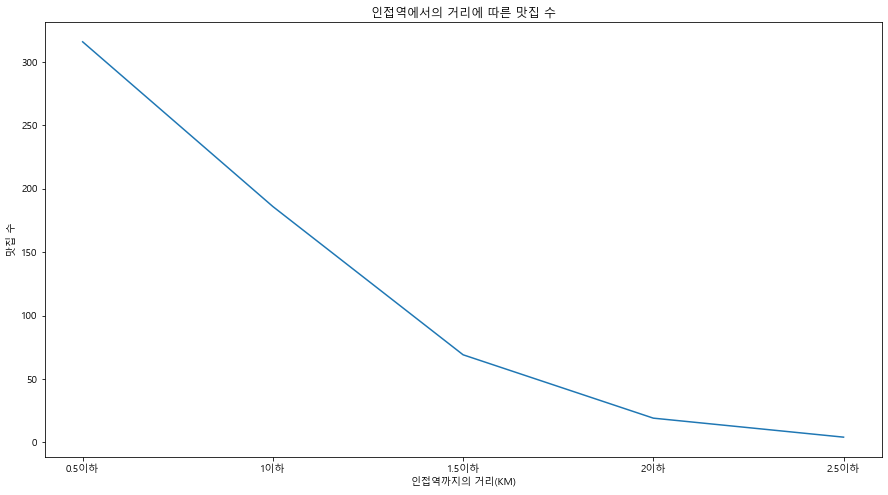

In [63]:
plt.figure(figsize=(15, 8))
plt.plot(df_dis['거리'], df_dis['수'])

plt.xlabel('인접역까지의 거리(KM)')
plt.ylabel('맛집 수')
plt.title('인접역에서의 거리에 따른 맛집 수')
plt.show()